In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import src.util as utils
import pandas as pd
import numpy as np
from imblearn.under_sampling import RandomUnderSampler

## 2. Load Configuration File

In [2]:
config = utils.load_config()

## 3. Load Train Set

In [3]:
x_train = utils.pickle_load(config["train_set_path"][0])
y_train = utils.pickle_load(config["train_set_path"][1])

In [4]:
train_set = pd.concat([x_train, y_train], axis = 1)

## 4. Data Exploration

### 4.1 Quick look dataset

In [5]:
# Quick take a look to our train data
train_set

,Temperature[C],Humidity[%],Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,CNT,Fire Alarm
43502,27.120,47.37,938.728,1.66,1.73,11.46,1.787,0.040,1228,405,12909,19428,18508,1
16652,13.211,47.92,938.763,2.24,2.33,15.44,2.408,0.054,1264,424,12869,19410,16652,1
53451,28.170,43.68,937.321,1.85,1.93,12.76,1.991,0.045,125,400,12793,20595,2309,0
28269,20.540,58.07,939.689,2.25,2.34,15.48,2.414,0.055,202,400,13188,20014,3275,1
11367,10.413,47.82,939.098,2.07,2.15,14.27,2.226,0.050,1073,629,12797,19449,11367,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9809,-3.870,53.07,939.159,2.60,2.70,17.89,2.789,0.063,689,876,12685,19562,9809,1
57969,-6.808,45.95,937.511,2.37,2.46,16.33,2.546,0.058,82,409,12784,20659,1083,0
1350,26.577,56.23,939.719,0.61,0.63,4.19,0.654,0.015,1,400,13095,19993,1350,0
43633,24.920,51.94,938.736,1.34,1.39,9.23,1.439,0.033,1230,415,12909,19427,18639,1


Column name can be more simple, not a majore problem

### 4.2 Label Distribution

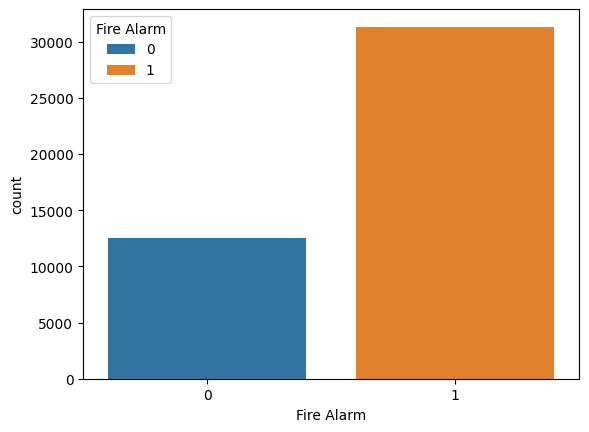

In [6]:
# Check distribution of our label data
ax = sns.countplot(data=train_set, x="Fire Alarm", hue="Fire Alarm")

Class 1 is **more than twice** as much as class 0, We need to **balancing** it

In [7]:
x, y = RandomUnderSampler(random_state=42).fit_resample(x_train, y_train)
train_set_bal = pd.concat([x,y], axis=1)

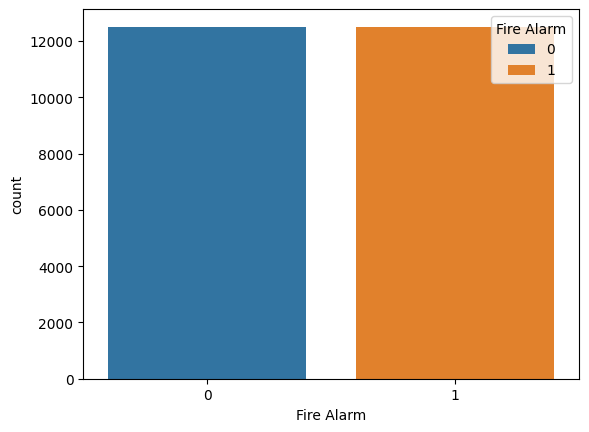

In [8]:
ax = sns.countplot(data=train_set_bal, x="Fire Alarm", hue="Fire Alarm")

### 4.3 Temperature Distribution

<Axes: xlabel='Temperature[C]', ylabel='Density'>

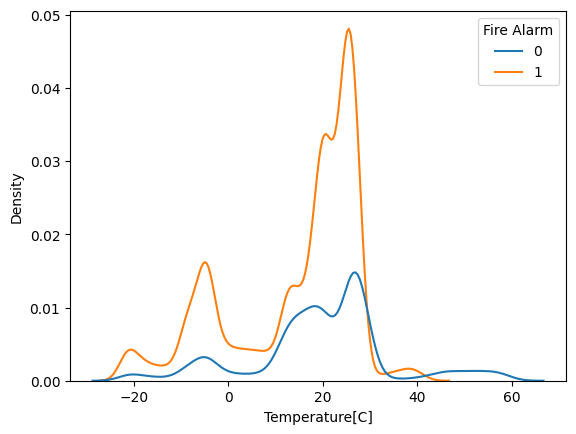

In [9]:
# Distribution for unbalance data
sns.kdeplot(data=train_set, x="Temperature[C]", hue="Fire Alarm")

<Axes: xlabel='Temperature[C]', ylabel='Density'>

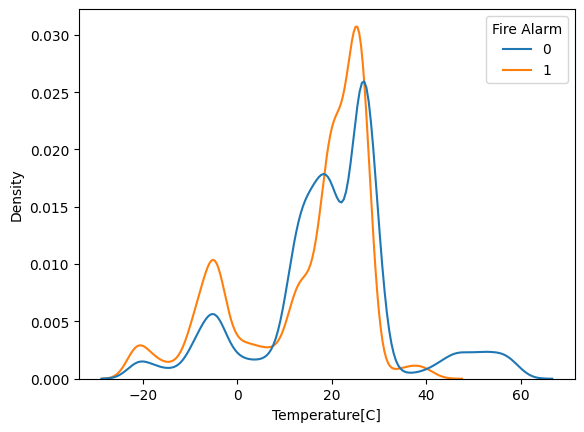

In [10]:
## Distribution for unbalance data
sns.kdeplot(data=train_set_bal, x="Temperature[C]", hue="Fire Alarm")

### 4.4 Humidity Distribution

<Axes: xlabel='Humidity[%]', ylabel='Density'>

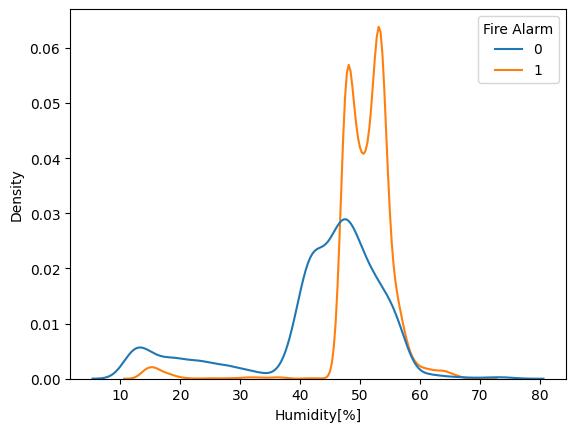

In [11]:
# Distribution for unbalance data
sns.kdeplot(data=train_set_bal, x="Humidity[%]", hue="Fire Alarm")

<Axes: xlabel='Humidity[%]'>

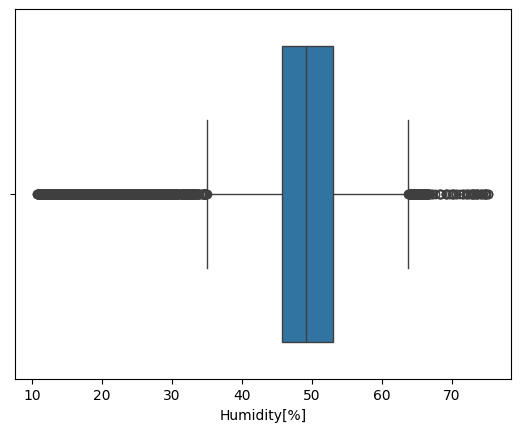

In [12]:
# Check for iqr
sns.boxplot(data=train_set_bal, x="Humidity[%]")

In [13]:
# Find tje q1 and q3 to create iqr
q1 = train_set_bal["Humidity[%]"].quantile(0.25)
q3 = train_set_bal["Humidity[%]"].quantile(0.75)
iqr = q3 - q1

In [14]:
q1, q3, iqr

(np.float64(45.75), np.float64(52.93), np.float64(7.18))

In [15]:
# Filter out rows that outside of range q1 - (1.5 * iqr) and q3 + (1.5 * iqr)
train_set_bal_hum = train_set_bal[
    ~(
        (train_set_bal["Humidity[%]"] < (q1 - 1.5 * iqr)) | 
        (train_set_bal["Humidity[%]"] > (q3 + 1.5 * iqr))
    )
].copy()

<Axes: xlabel='Humidity[%]', ylabel='Density'>

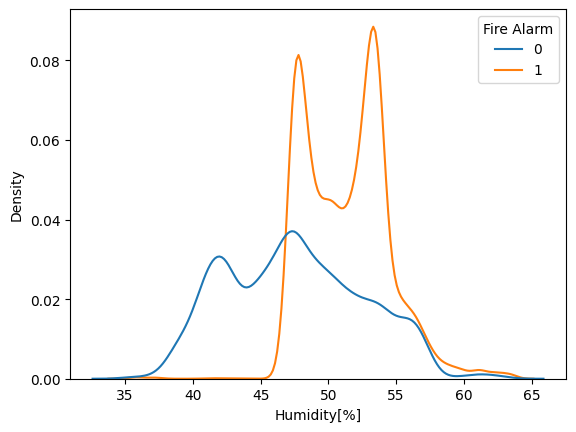

In [16]:
sns.kdeplot(data=train_set_bal_hum, x="Humidity[%]", hue="Fire Alarm")

In [17]:
train_set_bal_hum

,Temperature[C],Humidity[%],Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,CNT,Fire Alarm
53451,28.170,43.68,937.321,1.85,1.93,12.76,1.991,0.045,125,400,12793,20595,2309,0
25708,13.700,49.80,939.766,0.27,0.28,1.86,0.290,0.007,21,400,12910,19855,714,0
2652,15.805,53.33,939.655,1.06,1.10,7.26,1.132,0.026,85,400,13193,20099,2652,0
54579,25.450,44.76,937.426,2.03,2.11,13.99,2.181,0.049,0,400,13225,21142,3437,0
27349,17.510,53.84,939.570,1.31,1.36,9.03,1.408,0.032,27,400,13202,20139,2355,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45974,24.790,52.24,938.688,1.91,1.98,13.14,2.050,0.046,1354,422,12946,19381,20980,1
42412,26.950,47.88,938.750,1.47,1.53,10.15,1.582,0.036,1132,400,12910,19447,17418,1
22956,-21.760,51.23,938.729,1.71,1.78,11.76,1.834,0.041,1341,413,12963,19392,22956,1
21527,-5.720,53.31,938.729,1.68,1.75,11.58,1.806,0.041,1346,418,12952,19387,21527,1


### 4.5 Preassure Distribution

<Axes: xlabel='Pressure[hPa]', ylabel='Density'>

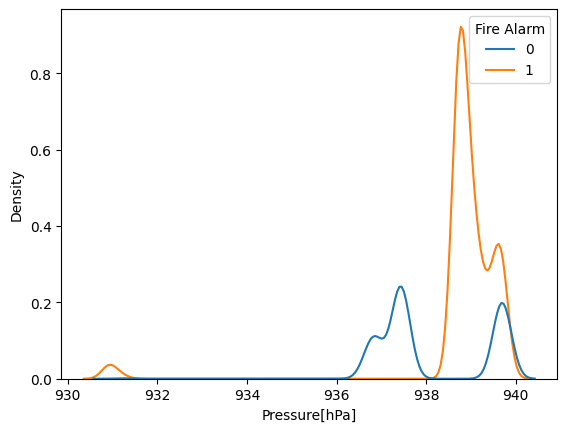

In [18]:
# # Check distribution of pressure
sns.kdeplot(data=train_set, x="Pressure[hPa]", hue="Fire Alarm")

<Axes: xlabel='Pressure[hPa]', ylabel='Density'>

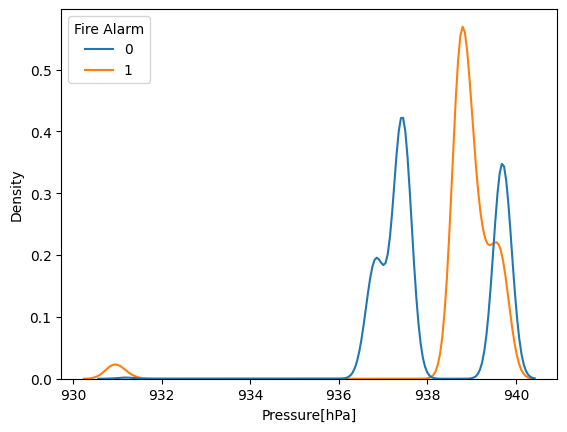

In [19]:
sns.kdeplot(data=train_set_bal, x="Pressure[hPa]", hue="Fire Alarm")

<Axes: xlabel='Pressure[hPa]'>

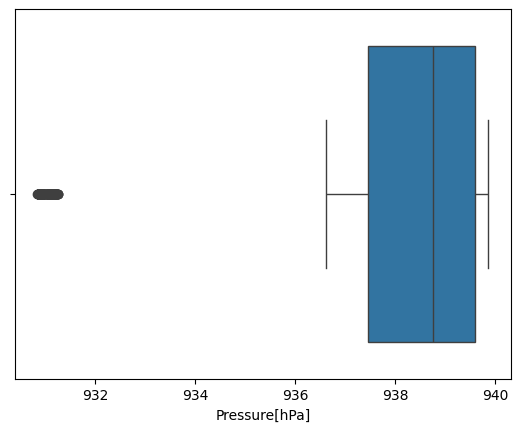

In [20]:
sns.boxplot(data=train_set_bal, x="Pressure[hPa]")

In [21]:
# Find tje q1 and q3 to create iqr
q1 = train_set_bal["Pressure[hPa]"].quantile(0.25)
q3 = train_set_bal["Pressure[hPa]"].quantile(0.75)
iqr = q3 - q1

In [22]:
# Filter out rows that outside of range q1 - (1.5 * iqr) and q3 + (1.5 * iqr)
train_set_bal_pres = train_set_bal[
    ~(
        (train_set_bal["Pressure[hPa]"] < (q1 - 1.5 * iqr)) |
        (train_set_bal["Pressure[hPa]"] > (q3 + 1.5 * iqr))
    )
].copy()

<Axes: xlabel='Pressure[hPa]', ylabel='Density'>

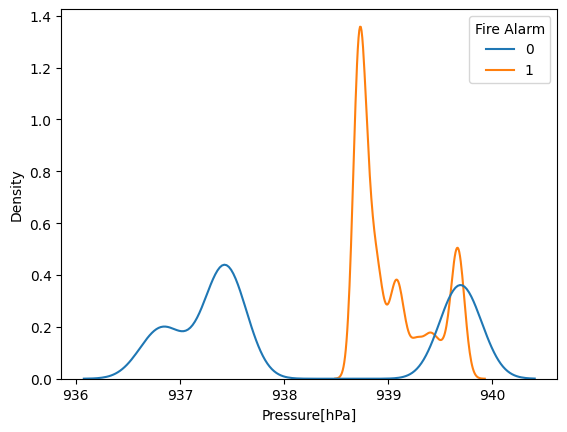

In [23]:
sns.kdeplot(data=train_set_bal_pres, x="Pressure[hPa]", hue="Fire Alarm")

In [24]:
train_set_bal_pres

,Temperature[C],Humidity[%],Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,CNT,Fire Alarm
53451,28.170,43.68,937.321,1.85,1.93,12.76,1.991,0.045,125,400,12793,20595,2309,0
25708,13.700,49.80,939.766,0.27,0.28,1.86,0.290,0.007,21,400,12910,19855,714,0
56033,46.780,29.32,936.903,707.59,735.16,4870.08,759.431,17.152,60000,4652,11718,17269,4891,0
2652,15.805,53.33,939.655,1.06,1.10,7.26,1.132,0.026,85,400,13193,20099,2652,0
54579,25.450,44.76,937.426,2.03,2.11,13.99,2.181,0.049,0,400,13225,21142,3437,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45974,24.790,52.24,938.688,1.91,1.98,13.14,2.050,0.046,1354,422,12946,19381,20980,1
42412,26.950,47.88,938.750,1.47,1.53,10.15,1.582,0.036,1132,400,12910,19447,17418,1
22956,-21.760,51.23,938.729,1.71,1.78,11.76,1.834,0.041,1341,413,12963,19392,22956,1
21527,-5.720,53.31,938.729,1.68,1.75,11.58,1.806,0.041,1346,418,12952,19387,21527,1


### 4.6 PM 1.0 Distribution

<Axes: xlabel='PM1.0', ylabel='Density'>

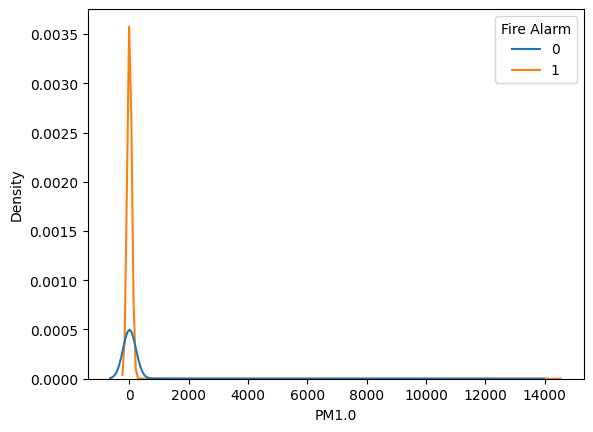

In [25]:
# Check distribution of PM 1.0
sns.kdeplot(data=train_set, x="PM1.0", hue="Fire Alarm")

In [26]:
train_set["PM1.0"].describe(percentiles=[.25, .50, .75, .80, .90, .95, .99])

count    43841.000000
mean       102.290941
std        934.328679
min          0.000000
25%          1.290000
50%          1.810000
75%          2.090000
80%          2.170000
90%          2.370000
95%          2.560000
99%       3998.182000
max      14318.170000
Name: PM1.0, dtype: float64

<Axes: xlabel='PM1.0'>

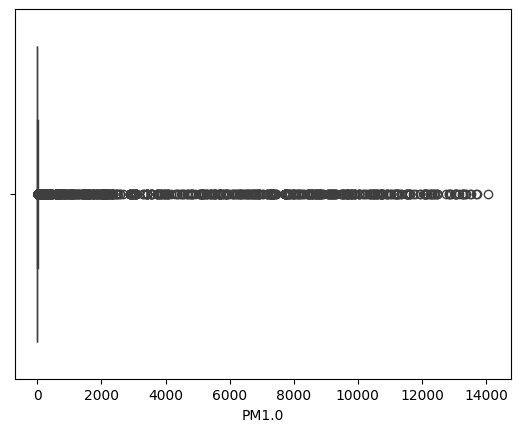

In [27]:
sns.boxplot(data=train_set_bal, x="PM1.0")

In [28]:
# Find tje q1 and q3 to create iqr
q1 = train_set_bal["PM1.0"].quantile(0.25)
q3 = train_set_bal["PM1.0"].quantile(0.75)
iqr = q3 - q1

In [29]:
# Filter out rows that outside of range q1 - (1.5 * iqr) and q3 + (1.5 * iqr)
train_set_bal_pm1 = train_set_bal[
    ~(
        (train_set_bal["PM1.0"] < (q1 - 1.5 * iqr)) | 
        (train_set_bal["PM1.0"] > (q3 + 1.5 * iqr))
    )
].copy()

<Axes: xlabel='PM1.0', ylabel='Density'>

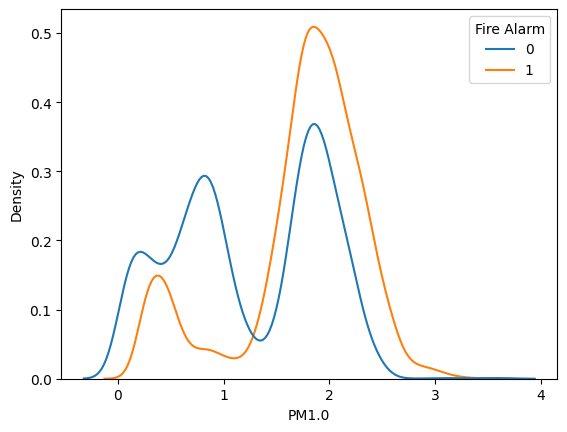

In [30]:
sns.kdeplot(data=train_set_bal_pm1, x="PM1.0", hue="Fire Alarm")

In [31]:
train_set_bal_pm1

,Temperature[C],Humidity[%],Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,CNT,Fire Alarm
53451,28.170,43.68,937.321,1.85,1.93,12.76,1.991,0.045,125,400,12793,20595,2309,0
25708,13.700,49.80,939.766,0.27,0.28,1.86,0.290,0.007,21,400,12910,19855,714,0
2652,15.805,53.33,939.655,1.06,1.10,7.26,1.132,0.026,85,400,13193,20099,2652,0
54579,25.450,44.76,937.426,2.03,2.11,13.99,2.181,0.049,0,400,13225,21142,3437,0
55826,47.110,16.15,936.820,1.12,1.16,7.69,1.199,0.027,347,400,13466,20811,4684,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45974,24.790,52.24,938.688,1.91,1.98,13.14,2.050,0.046,1354,422,12946,19381,20980,1
42412,26.950,47.88,938.750,1.47,1.53,10.15,1.582,0.036,1132,400,12910,19447,17418,1
22956,-21.760,51.23,938.729,1.71,1.78,11.76,1.834,0.041,1341,413,12963,19392,22956,1
21527,-5.720,53.31,938.729,1.68,1.75,11.58,1.806,0.041,1346,418,12952,19387,21527,1


### NC 2.5 Distribution

<Axes: xlabel='NC2.5', ylabel='Density'>

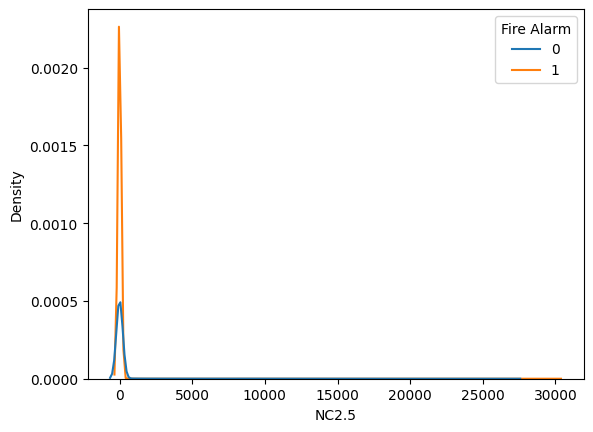

In [32]:
# Check distribution of PM 1.0
sns.kdeplot(data=train_set, x="NC2.5", hue="Fire Alarm")

In [33]:
train_set["NC2.5"].describe(percentiles=[.25, .50, .75, .80, .90, .95, .99])

count    43841.000000
mean        82.795896
std       1100.423571
min          0.000000
25%          0.033000
50%          0.044000
75%          0.051000
80%          0.053000
90%          0.058000
95%          0.063000
99%        402.698400
max      30026.438000
Name: NC2.5, dtype: float64

In [34]:
# find q1 and q3 to create iqr
q1 = train_set_bal["NC2.5"].quantile(0.25)
q3 = train_set_bal["NC2.5"].quantile(0.75)
iqr = q3 - q1

In [35]:
# Filter out rows that outside of range q1 - (1.5 * iqr) and q3 + (1.5 * iqr)
train_set_bal_nc25 = train_set_bal[~((train_set_bal["NC2.5"] < (q1 - 1.5 * iqr)) | (train_set_bal["NC2.5"] > (q3 + 1.5 * iqr)))].copy()

<Axes: xlabel='NC2.5', ylabel='Density'>

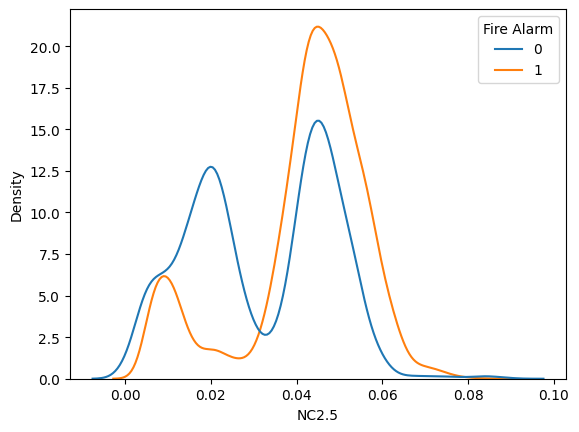

In [36]:
sns.kdeplot(data=train_set_bal_nc25, x="NC2.5", hue="Fire Alarm")

In [37]:
train_set_bal_nc25

,Temperature[C],Humidity[%],Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,CNT,Fire Alarm
53451,28.170,43.68,937.321,1.85,1.93,12.76,1.991,0.045,125,400,12793,20595,2309,0
25708,13.700,49.80,939.766,0.27,0.28,1.86,0.290,0.007,21,400,12910,19855,714,0
2652,15.805,53.33,939.655,1.06,1.10,7.26,1.132,0.026,85,400,13193,20099,2652,0
54579,25.450,44.76,937.426,2.03,2.11,13.99,2.181,0.049,0,400,13225,21142,3437,0
55826,47.110,16.15,936.820,1.12,1.16,7.69,1.199,0.027,347,400,13466,20811,4684,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45974,24.790,52.24,938.688,1.91,1.98,13.14,2.050,0.046,1354,422,12946,19381,20980,1
42412,26.950,47.88,938.750,1.47,1.53,10.15,1.582,0.036,1132,400,12910,19447,17418,1
22956,-21.760,51.23,938.729,1.71,1.78,11.76,1.834,0.041,1341,413,12963,19392,22956,1
21527,-5.720,53.31,938.729,1.68,1.75,11.58,1.806,0.041,1346,418,12952,19387,21527,1


### 4.11 TVOC Distribution

<Axes: xlabel='TVOC[ppb]', ylabel='Density'>

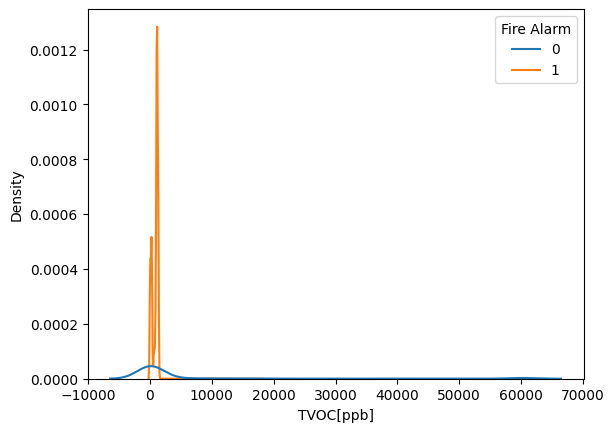

In [40]:
# Check sitribution of TVOC
sns.kdeplot(data=train_set, x="TVOC[ppb]", hue="Fire Alarm")

In [41]:
train_set["NC2.5"].describe(percentiles=[.25, .50, .75, .80, .90, .95, .99])

count    43841.000000
mean        82.795896
std       1100.423571
min          0.000000
25%          0.033000
50%          0.044000
75%          0.051000
80%          0.053000
90%          0.058000
95%          0.063000
99%        402.698400
max      30026.438000
Name: NC2.5, dtype: float64

<Axes: xlabel='TVOC[ppb]'>

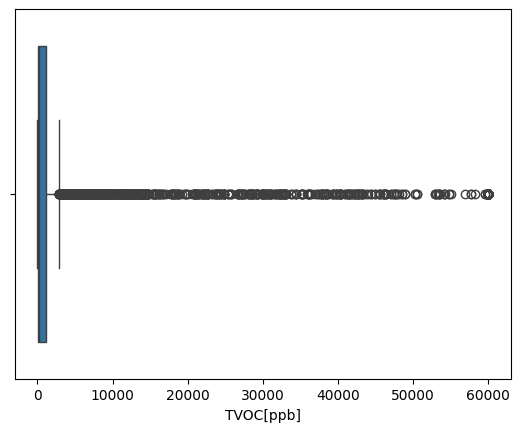

In [42]:
sns.boxplot(data=train_set_bal, x="TVOC[ppb]")

In [43]:
# find q1 and q3 to create iqr
q1 = train_set_bal["TVOC[ppb]"].quantile(0.25)
q3 = train_set_bal["TVOC[ppb]"].quantile(0.75)
iqr = q3 - q1

In [44]:
train_set_bal_tvoc = train_set_bal[
    ~((train_set_bal["TVOC[ppb]"] < (q1 - 1.5 * iqr)) | 
      (train_set_bal["TVOC[ppb]"] > (q3 + 1.5 * iqr)))
].copy()

<Axes: xlabel='TVOC[ppb]', ylabel='Density'>

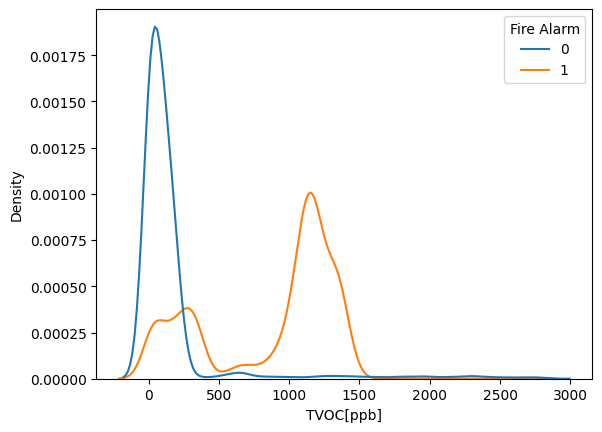

In [45]:
sns.kdeplot(data=train_set_bal_tvoc, x="TVOC[ppb]", hue="Fire Alarm")

In [46]:
train_set_bal_tvoc

,Temperature[C],Humidity[%],Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,CNT,Fire Alarm
53451,28.170,43.68,937.321,1.85,1.93,12.76,1.991,0.045,125,400,12793,20595,2309,0
25708,13.700,49.80,939.766,0.27,0.28,1.86,0.290,0.007,21,400,12910,19855,714,0
2652,15.805,53.33,939.655,1.06,1.10,7.26,1.132,0.026,85,400,13193,20099,2652,0
54579,25.450,44.76,937.426,2.03,2.11,13.99,2.181,0.049,0,400,13225,21142,3437,0
55826,47.110,16.15,936.820,1.12,1.16,7.69,1.199,0.027,347,400,13466,20811,4684,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45974,24.790,52.24,938.688,1.91,1.98,13.14,2.050,0.046,1354,422,12946,19381,20980,1
42412,26.950,47.88,938.750,1.47,1.53,10.15,1.582,0.036,1132,400,12910,19447,17418,1
22956,-21.760,51.23,938.729,1.71,1.78,11.76,1.834,0.041,1341,413,12963,19392,22956,1
21527,-5.720,53.31,938.729,1.68,1.75,11.58,1.806,0.041,1346,418,12952,19387,21527,1


### 4.12 eCO2 Distribution

<Axes: xlabel='eCO2[ppm]', ylabel='Density'>

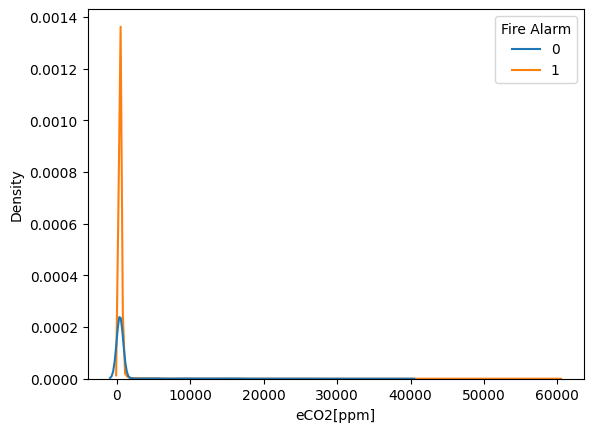

In [47]:
sns.kdeplot(data=train_set, x="eCO2[ppm]", hue="Fire Alarm")

In [48]:
train_set["NC2.5"].describe(percentiles=[.25, .50, .75, .80, .90, .95, .99])

count    43841.000000
mean        82.795896
std       1100.423571
min          0.000000
25%          0.033000
50%          0.044000
75%          0.051000
80%          0.053000
90%          0.058000
95%          0.063000
99%        402.698400
max      30026.438000
Name: NC2.5, dtype: float64

<Axes: xlabel='eCO2[ppm]'>

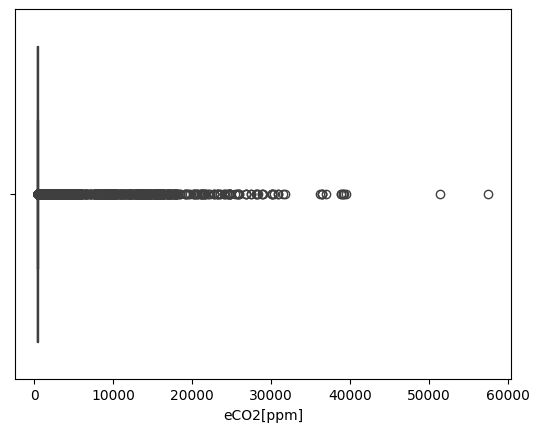

In [49]:
sns.boxplot(data=train_set_bal, x="eCO2[ppm]")

In [50]:
# Find q1 and q3 to create iqr
q1 = train_set_bal["eCO2[ppm]"].quantile(0.25)
q3 = train_set_bal["eCO2[ppm]"].quantile(0.75)
iqr = q3 - q1

In [51]:
train_set_bal_eco2 = train_set_bal[
    ~(
        (train_set_bal["eCO2[ppm]"] < (q1 - 1.5 * iqr)) |
        (train_set_bal["eCO2[ppm]"] > (q3 + 1.5 * iqr))
    )
].copy()

<Axes: xlabel='eCO2[ppm]', ylabel='Density'>

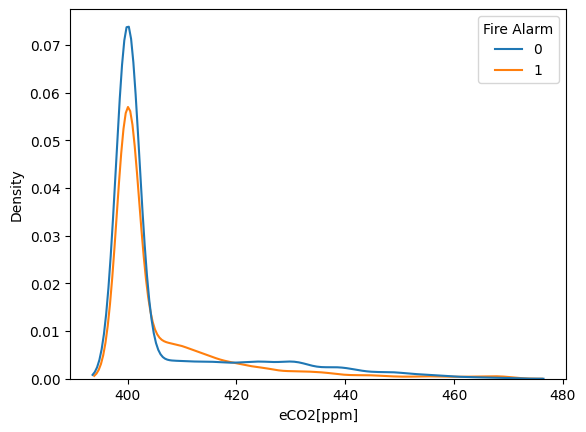

In [52]:
sns.kdeplot(data=train_set_bal_eco2, x="eCO2[ppm]", hue="Fire Alarm")

In [53]:
train_set_bal_eco2

,Temperature[C],Humidity[%],Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,CNT,Fire Alarm
53451,28.170,43.68,937.321,1.85,1.93,12.76,1.991,0.045,125,400,12793,20595,2309,0
25708,13.700,49.80,939.766,0.27,0.28,1.86,0.290,0.007,21,400,12910,19855,714,0
2652,15.805,53.33,939.655,1.06,1.10,7.26,1.132,0.026,85,400,13193,20099,2652,0
54579,25.450,44.76,937.426,2.03,2.11,13.99,2.181,0.049,0,400,13225,21142,3437,0
55826,47.110,16.15,936.820,1.12,1.16,7.69,1.199,0.027,347,400,13466,20811,4684,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8586,-4.875,56.77,939.334,0.44,0.45,3.01,0.469,0.011,345,400,13087,19914,8586,1
45974,24.790,52.24,938.688,1.91,1.98,13.14,2.050,0.046,1354,422,12946,19381,20980,1
42412,26.950,47.88,938.750,1.47,1.53,10.15,1.582,0.036,1132,400,12910,19447,17418,1
22956,-21.760,51.23,938.729,1.71,1.78,11.76,1.834,0.041,1341,413,12963,19392,22956,1


### 4.13 Raw H2 Distribution

<Axes: xlabel='Raw H2', ylabel='Density'>

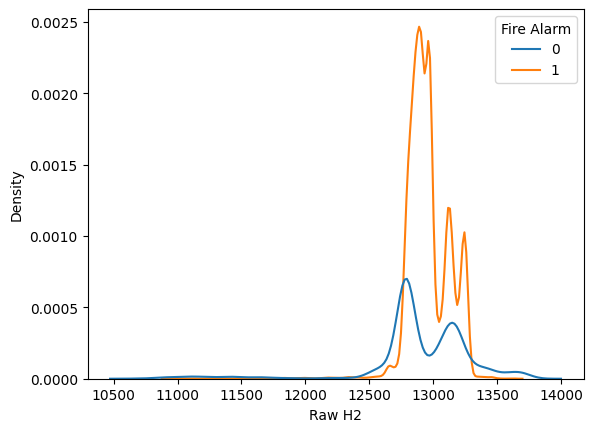

In [54]:
sns.kdeplot(data=train_set, x="Raw H2", hue="Fire Alarm")

In [56]:
train_set["Raw H2"].describe(percentiles=[.25, .50, .75, .80, .90, .95, .99])

count    43841.000000
mean     12942.081453
std        271.552695
min      10668.000000
25%      12830.000000
50%      12923.000000
75%      13108.000000
80%      13132.000000
90%      13219.000000
95%      13256.000000
99%      13560.000000
max      13803.000000
Name: Raw H2, dtype: float64

<Axes: xlabel='Raw H2'>

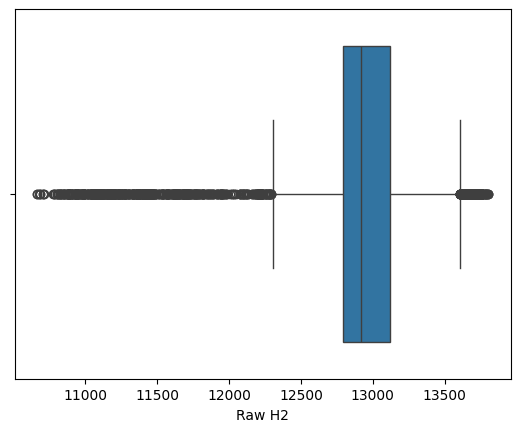

In [57]:
sns.boxplot(data=train_set_bal, x="Raw H2")

In [66]:
# Find q1 and q3 to create iqr
q1 = train_set_bal["Raw H2"].quantile(0.25)
q3 = train_set_bal["Raw H2"].quantile(0.75)
iqr = q3 - q1

In [67]:
train_set_bal_h2 = train_set_bal[
    ~(
        (train_set_bal["Raw H2"] < (q1 - 1.5 * iqr)) |
        (train_set_bal["Raw H2"] > (q3 + 1.5 * iqr))
    )
].copy()

<Axes: xlabel='Raw H2', ylabel='Density'>

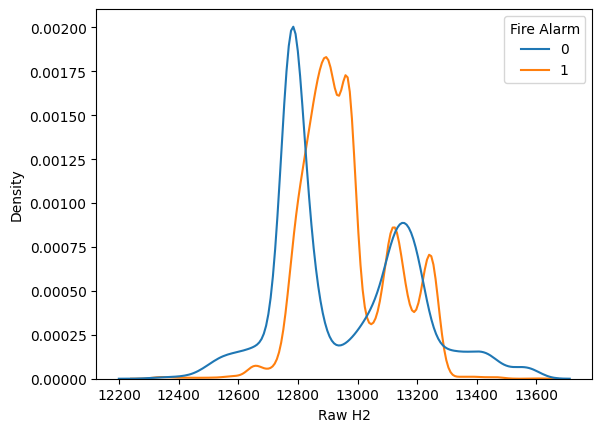

In [68]:
sns.kdeplot(data=train_set_bal_h2, x="Raw H2", hue="Fire Alarm")

### 4.14 Raw Etanol Distribution

<Axes: xlabel='Raw Ethanol', ylabel='Density'>

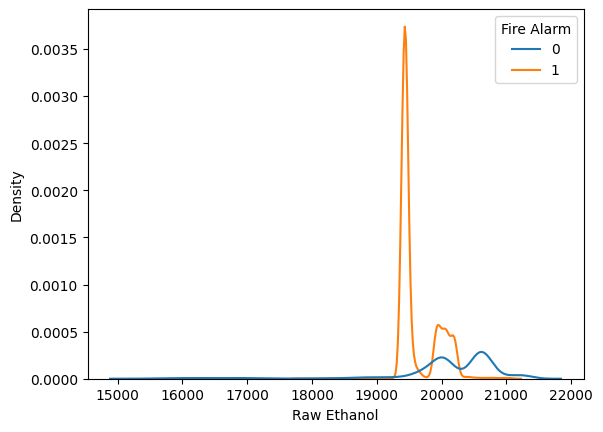

In [69]:
sns.kdeplot(data=train_set, x="Raw Ethanol", hue="Fire Alarm")

In [70]:
train_set["Raw Ethanol"].describe(percentiles=[.25, .50, .75, .80, .90, .95, .99])

count    43841.000000
mean     19755.379371
std        607.683882
min      15317.000000
25%      19435.000000
50%      19503.000000
75%      20078.000000
80%      20155.000000
90%      20572.000000
95%      20674.000000
99%      21187.000000
max      21410.000000
Name: Raw Ethanol, dtype: float64

<Axes: xlabel='Raw Ethanol'>

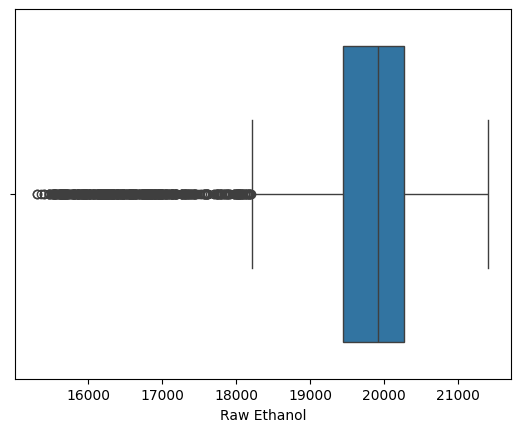

In [71]:
sns.boxplot(data=train_set_bal, x="Raw Ethanol")

In [72]:
# Find q1 and q3 to create iqr
q1 = train_set_bal["Raw Ethanol"].quantile(0.25)
q3 = train_set_bal["Raw Ethanol"].quantile(0.75)
iqr = q3 - q1

In [73]:
train_set_bal_etha = train_set_bal[
    ~(
        (train_set_bal["Raw Ethanol"] < (q1 - 1.5 * iqr)) |
        (train_set_bal["Raw Ethanol"] > (q3 + 1.5 * iqr))
    )
].copy()

<Axes: xlabel='Raw Ethanol', ylabel='Density'>

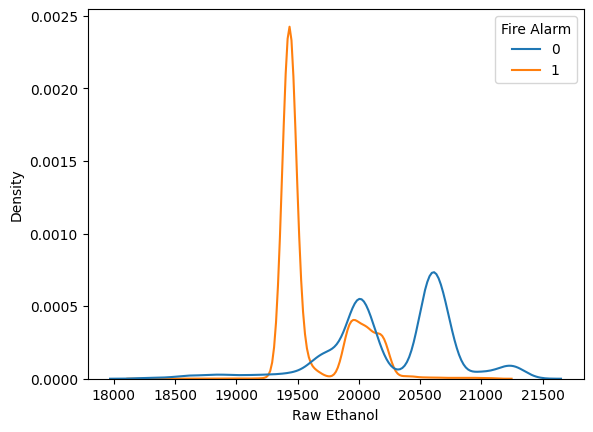

In [74]:
sns.kdeplot(data=train_set_bal_etha, x="Raw Ethanol", hue="Fire Alarm")

In [75]:
train_set_bal_etha

,Temperature[C],Humidity[%],Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,CNT,Fire Alarm
53451,28.170,43.68,937.321,1.85,1.93,12.76,1.991,0.045,125,400,12793,20595,2309,0
25708,13.700,49.80,939.766,0.27,0.28,1.86,0.290,0.007,21,400,12910,19855,714,0
2652,15.805,53.33,939.655,1.06,1.10,7.26,1.132,0.026,85,400,13193,20099,2652,0
54579,25.450,44.76,937.426,2.03,2.11,13.99,2.181,0.049,0,400,13225,21142,3437,0
55826,47.110,16.15,936.820,1.12,1.16,7.69,1.199,0.027,347,400,13466,20811,4684,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45974,24.790,52.24,938.688,1.91,1.98,13.14,2.050,0.046,1354,422,12946,19381,20980,1
42412,26.950,47.88,938.750,1.47,1.53,10.15,1.582,0.036,1132,400,12910,19447,17418,1
22956,-21.760,51.23,938.729,1.71,1.78,11.76,1.834,0.041,1341,413,12963,19392,22956,1
21527,-5.720,53.31,938.729,1.68,1.75,11.58,1.806,0.041,1346,418,12952,19387,21527,1
